In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

In [13]:
def preprocess(x,y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)

    return x,y

def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)

    return tf.data.Dataset.from_tensor_slices((xs,ys)) \
        .map(preprocess) \
        .shuffle(len(ys)) \
        .batch(128)

In [14]:
train_ds = create_dataset(x_train,y_train)
val_ds = create_dataset(x_val, y_val)


In [15]:
model = keras.Sequential([
    keras.layers.Reshape(
        target_shape=(28 * 28,), input_shape=(28,28)
    ),
    keras.layers.Dense(
        units=256, activation='relu'
    ),
    keras.layers.Dense(
        units=192, activation='relu'
    ),
    keras.layers.Dense(
        units=128, activation='relu'
    ),
    keras.layers.Dense(
        units=10, activation='softmax'
    )
])

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_ds.repeat(),
    epochs=10,
    steps_per_epoch=500,
    validation_data=val_ds.repeat(),
    validation_steps=2
)

Train for 500 steps, validate for 2 steps
Epoch 1/10
500/500 [==============================] - 16s 31ms/step - loss: 1.6770 - accuracy: 0.7887 - val_loss: 1.5897 - val_accuracy: 0.8750
Epoch 2/10
500/500 [==============================] - 11s 21ms/step - loss: 1.6237 - accuracy: 0.8379 - val_loss: 1.6349 - val_accuracy: 0.8320
Epoch 3/10
500/500 [==============================] - 10s 20ms/step - loss: 1.6124 - accuracy: 0.8491 - val_loss: 1.6070 - val_accuracy: 0.8555
Epoch 4/10
500/500 [==============================] - 11s 21ms/step - loss: 1.6071 - accuracy: 0.8543 - val_loss: 1.6115 - val_accuracy: 0.8516
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 1.6006 - accuracy: 0.8605 - val_loss: 1.6071 - val_accuracy: 0.8477
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 1.5973 - accuracy: 0.8637 - val_loss: 1.6113 - val_accuracy: 0.8516
Epoch 7/10
500/500 [==============================] - 9s 19ms/step - loss: 1.5971 - accuracy: 0.

In [17]:
predictions = model.predict(val_ds)
best_predictions = [i.argmax() for i in predictions]
correct = 0
for i in range(len(best_predictions)):
    if best_predictions[i] == y_val[i]:
        correct += 1
print(correct/len(y_val)*100)

10.25


In [18]:
model.save('fashion_mnist(10.4).h5')

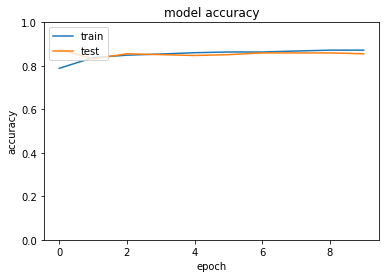

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='upper left');

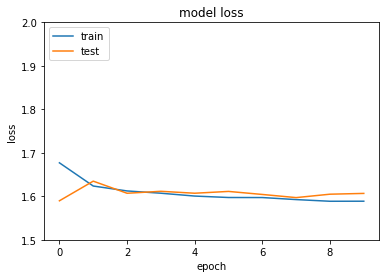

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((1.5, 2))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

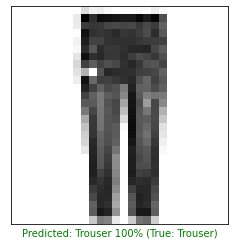

In [33]:
i = 200
plot_image(i, predictions, y_val, x_val)